# Carregando bibliotecas e base de dados

In [348]:
!pip install category_encoders
!pip install feature_engine

In [349]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from feature_engine.selection import DropConstantFeatures
from sklearn.impute import SimpleImputer
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
import re

In [350]:
phones = pd.read_csv('/content/drive/MyDrive/Universidade de dados/Semana 9: Feature Selection e Permutation Importance/Data.csv')
pd.set_option('display.max_columns', None)
phones.head()

,Código,Código de barras,Marca,Tipo de Chip,Multichip,Tipo de Tela,Tamanho do Display,Resolução,Câmera Traseira,Câmera Frontal,Filmadora,Processador,Memória RAM,Memória Interna,Expansivo até?,Banda,Conexões,"Alimentação, tipo de bateria",Conteúdo da Embalagem,Garantia do Fornecedor,Dimensões do produto - cm (AxLxP),Modelo,Referência do Modelo,SAC,Cor,Preço
0,7275057807,7892509127547,Samsung,Nano-SIM (4FF),Dual Chip,PLS LCD,"6.6""",1080 x 2408 (FHD+),50MP + 5MP + 2MP,13MP,FHD (1920 x 1080),Octa-Core 2GHz,4GB,128GB,MicroSD até 1TB,"GSM850,GSM900,DCS1800,PCS1900 / B1(2100),B2(19...","Wi-Fi, 2G, 3G e 4G",Íons de Lítio 5000mAh,"Aparelho celular, carregador, cabo USB, Extrat...",12 Meses,"16,7x7,8x0,91cm",SM-A145M/DS,Galaxy A14 4G 128GB,4004-0000 (Capitais e grandes centros) ou 0800...,Prata,"R$ 999,00"
1,7248194865,7892597353132,Motorola,Nano SIM,Dual Chip,IPS,"6,5""",HD+ (720x1600),Dupla: Principal de 16MP + Sensor de Profundid...,5MP,Full HD (30fps),MediaTek G37,4GB,128GB,Até 1TB com Micro SD,4G,"Bluetooth, Wi-Fi",Carregador Rápido 10W,"1 Smartphone, Kit de manuais, 1 Cabo USB-A/USB...",12 meses,18x9x5cm,E22,XT2239-10,4002-1244 (capitais e regiões metropolitanas) ...,"Preto,Moto e22 - Grafite,Moto e22 - Branco,Azul","R$ 809,10"
2,7332621276,7892509127530,Samsung,Nano-SIM (4FF),Dual Chip,PLS LCD,"6.6""",1080 x 2408 (FHD+),50MP + 5MP + 2MP,13MP,FHD (1920 x 1080),Octa-Core 2GHz,4GB,128GB,MicroSD até 1TB,"GSM850,GSM900,DCS1800,PCS1900 / B1(2100),B2(19...","Wi-Fi, 2G, 3G e 4G",Íons de Lítio 5000mAh,"Aparelho celular, carregador, cabo USB, Extrat...",12 Meses,"16,7x7,8x0,91cm",SM-A145M,Galaxy A14 4G 128GB,4004-0000 (Capitais e grandes centros) ou 0800...,Preto,"R$ 1.870,79"
3,7414597353,7892597353088,Motorola,"Nano SIM, e-SIM",Dual Chip,IPS,"6,5""",HD+ (720x1600),Dupla: Principal de 50MP + Macro de 2MP,8MP,Full HD (30fps),Snapdragon 480+ Octa-Core,4GB + RAM Boost,128GB,Até 1TB com Micro SD,5G,"Bluetooth, Wi-Fi",TurboPower 20W,"1 Smartphone, Kit de manuais, 1 Cabo USB-A/USB...",12 meses,17x8x5cm,PAVU00,XT2335-1,4002-1244 (capitais e regiões metropolitanas) ...,"Preto,Grafite,Azul","R$ 719,00"
4,7275057022,7892509127523,Motorola,Nano SIM,Dual Chip,IPS,"6,5""",HD+ (720x1600),Dupla: Principal de 16MP + Sensor de Profundid...,5MP,Full HD (30fps),MediaTek G37,4GB,128GB,Até 1TB com Micro SD,4G,"Bluetooth, Wi-Fi",Carregador Rápido 10W,"1 Smartphone, Kit de manuais, 1 Cabo USB-A/USB...",12 meses,18x9x5cm,SM-A145M/DS,XT2239-10,4002-1244 (capitais e regiões metropolitanas) ...,Preto,"R$ 999,00"


# Preprocessamento

In [351]:
phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Código                             193 non-null    int64 
 1   Código de barras                   193 non-null    int64 
 2   Marca                              193 non-null    object
 3   Tipo de Chip                       193 non-null    object
 4   Multichip                          193 non-null    object
 5   Tipo de Tela                       193 non-null    object
 6   Tamanho do Display                 193 non-null    object
 7   Resolução                          193 non-null    object
 8   Câmera Traseira                    193 non-null    object
 9   Câmera Frontal                     193 non-null    object
 10  Filmadora                          193 non-null    object
 11  Processador                        193 non-null    object
 12  Memória 

In [352]:
phones.isna().sum()

Código                               0
Código de barras                     0
Marca                                0
Tipo de Chip                         0
Multichip                            0
Tipo de Tela                         0
Tamanho do Display                   0
Resolução                            0
Câmera Traseira                      0
Câmera Frontal                       0
Filmadora                            0
Processador                          0
Memória RAM                          0
Memória Interna                      0
Expansivo até?                       0
Banda                                0
Conexões                             0
Alimentação, tipo de bateria         0
Conteúdo da Embalagem                0
Garantia do Fornecedor               0
Dimensões do produto - cm (AxLxP)    0
Modelo                               0
Referência do Modelo                 0
SAC                                  0
Cor                                  0
Preço                    

Talvez depois seja eficiente fazer esse preprocessameto com o memoria ram e excluir a parte de: RAM Boost

Temos algumas colunas que apesar de serem numericas, estão com algumas incoerencias de digitação, vamos fazer o preprocessamento delas e converte-las para numerico

In [353]:
phones['Tamanho do Display'] = phones['Tamanho do Display'].str.replace('"', '')
phones['Tamanho do Display'] = phones['Tamanho do Display'].str.replace("''", '')
phones['Tamanho do Display'] = phones['Tamanho do Display'].str.replace(',', '.')

phones['Tamanho do Display'] = phones['Tamanho do Display'].astype(float)

In [354]:
phones['Dimensões do produto - cm (AxLxP)']

0         16,7x7,8x0,91cm
1                18x9x5cm
2         16,7x7,8x0,91cm
3                17x8x5cm
4                18x9x5cm
              ...        
188      16,1x7,81x0,82cm
189      15,8.x7,4x0,84cm
190     16,42x7,59x0,91cm
191     15,57x7,45x0,79cm
192    16.8 x 7.8 x 0.9cm
Name: Dimensões do produto - cm (AxLxP), Length: 193, dtype: object

In [355]:
def extrair_profundidade(frase):
  profundidade = frase.split('x')[-1]
  profundidade = profundidade.replace('cm', '')
  profundidade = profundidade.replace(',', '.')
  return float(profundidade)

phones['Profundidade - cm'] = phones['Dimensões do produto - cm (AxLxP)'].apply(extrair_profundidade)
phones = phones.drop(columns=['Dimensões do produto - cm (AxLxP)'])

In [356]:
phones['Memória Interna'] = phones['Memória Interna'].str.replace('GB', '')
phones['Memória Interna'] = phones['Memória Interna'].astype(float)

In [357]:
def extrair_valor_numerico(preco):
    valor_numerico = re.sub(r'[^\d,]', '', preco)  # Remove caracteres não numéricos exceto a vírgula
    valor_numerico = valor_numerico.replace(',', '.')  # Substitui ',' por '.' para formato numérico
    return float(valor_numerico)  # Converte para float

phones['Preço'] = phones['Preço'].apply(extrair_valor_numerico)

In [358]:
mapeamento = {
    'MicroSD até 1TB': 1,
    'Até 1TB com Micro SD': 1,
    'Não possui entrada para cartão de memória': 0,
    'Até 512GB com Micro SD': 0.512,
    'MicroSD até 512GB': 0.512
}

phones['Expansivo até?'] = phones['Expansivo até?'].replace(mapeamento)

phones['Expansivo até?'] = phones['Expansivo até?'].astype(float)

In [359]:
mapeamento = {
    '1080 x 2408 (FHD+)' : 2600640,
    'HD+ (720x1600)' : 1152000,
    '2340 x 1080 (FHD+)': 2527200,
    'HD+ (720 x 1600)': 1152000,
    '1080 x 2400 (FHD+)': 2592000,
    '1080 x 2340 (FHD+)': 2527200,
    '720 x 1600 (HD+)': 1152000,
    'FHD+ (1080 x 2400)': 2592000
}

phones['Resolução'] = phones['Resolução'].map(mapeamento)

phones['Resolução'] = phones['Resolução'].astype(int)

In [360]:
'''
3 - apenas 3g
4 - possui ate 4g
5 - possui ate 5g
'''
def extrair_conexao(string):
  new_string = 3
  if '5' in string:
    new_string = 5
  elif '4' in string:
    new_string = 4
  return new_string

phones['Conexões'] = phones['Conexões'].apply(extrair_conexao)
phones['Conexões'] = phones['Conexões'].astype(int)

In [361]:
def extrair_camera(string):
  numeros = []
  numero_atual = ""
  for caractere in string:
      if caractere.isdigit():
          numero_atual += caractere
      elif numero_atual:
          numeros.append(int(numero_atual))
          numero_atual = ""

  # Adiciona o último número à lista (se houver algum)
  if numero_atual:
      numeros.append(int(numero_atual))
  return sum(numeros)

phones['Câmera Traseira'] = phones['Câmera Traseira'].apply(extrair_camera)
phones['Câmera Traseira'] = phones['Câmera Traseira'].astype(int)

phones['Câmera Frontal'] = phones['Câmera Frontal'].apply(extrair_camera)
phones['Câmera Frontal'] = phones['Câmera Frontal'].astype(int)


In [362]:
phones.nunique().sort_values(ascending=False)

Código                          45
Código de barras                42
Preço                           40
Modelo                          32
Cor                             27
Câmera Traseira                 19
Processador                     18
Referência do Modelo            17
Banda                           13
Conteúdo da Embalagem           12
Profundidade - cm               11
Alimentação, tipo de bateria    10
Tipo de Tela                     9
Memória RAM                      6
Câmera Frontal                   6
Tamanho do Display               6
Filmadora                        5
Tipo de Chip                     5
Marca                            5
Resolução                        4
Memória Interna                  4
Expansivo até?                   3
Conexões                         3
SAC                              3
Garantia do Fornecedor           2
Multichip                        1
dtype: int64

In [363]:
phones['SAC'].unique()

array(['4004-0000 (Capitais e grandes centros) ou 0800-124-421 (Demais cidades e regiões)',
       '4002-1244 (capitais e regiões metropolitanas) ou 0800 773 1244 demais localidades',
       '4002-1244 Capitais e Regiões Metropolitanas ou 0800 773-1244 - Demais Regiões'],
      dtype=object)

In [364]:
phones['Garantia do Fornecedor'].unique()

array(['12 Meses', '12 meses'], dtype=object)

Algumas colunas so tem valores diferente por diferenciação entre maiusculo e minusculo, por desencargo de consciencia, vamos aplicar .lower() e converter para string todas as colunas que são object

In [365]:
colunas_object = phones.select_dtypes(include=['object']).columns
for col in colunas_object:
  phones[col] = phones[col].str.lower().astype(str)

In [366]:
mapeamento = {
    'fhd (1920 x 1080)': 'fhd',
    'full hd (30fps)': 'fhd',
    'uhd 8k': 'uhd',
    'full hd': 'fhd',
    'uhd 4k': 'uhd'
}

phones['Filmadora'] = phones['Filmadora'].map(mapeamento)

# EXCLUSÃO DE FEATURES CONSTANTES

In [367]:
phones.sample(2)

,Código,Código de barras,Marca,Tipo de Chip,Multichip,Tipo de Tela,Tamanho do Display,Resolução,Câmera Traseira,Câmera Frontal,Filmadora,Processador,Memória RAM,Memória Interna,Expansivo até?,Banda,Conexões,"Alimentação, tipo de bateria",Conteúdo da Embalagem,Garantia do Fornecedor,Modelo,Referência do Modelo,SAC,Cor,Preço,Profundidade - cm
42,7256011002,7892597353088,samsung,nano chip,dual chip,pls lcd,6.6,2600640,13,5,fhd,"unisoc t606 (1,6 ghz octa-core) arm mali-g57 1...",4gb,128.0,1.0,"""fdd: n1(2100),n3(1800),n5(850),n7(2600),n28(7...",5,bateria de íons de lítio de 5.000mah bivolt,"1 telefone,1 capa protetora,1 kit de manuais,1...",12 meses,e22,galaxy a14 5g 128gb,4004-0000 (capitais e grandes centros) ou 0800...,azul,846.00,0.90
131,7466723006,7892597353064,samsung,nano chip,dual chip,super amoled,6.4,2527200,8,5,uhd,octa-core 1.6ghz,6gb,128.0,0.0,"n1(2100),n3(1800),n5(850),n7(2600),n8(900),n20...",4,bateria de íons de lítio de 4.500mah bivolt,"aparelho celular, carregador, cabo usb, extrat...",12 meses,smartphone motorola moto e13 64gb 4gb ram - verde,galaxy s21 fe 5g 128 gb,4004-0000 (capitais e grandes centros) ou 0800...,verde,578.99,0.79


Conceito: Iremos excluir as features com **pouca ou nenhuma variancia**, uma vez que elas teriam uma importancia minima para a predição, pois se:
- Feature A seja 1 para salario igual a 1000
- Feature A seja 1 para salario igual a 5000
- Feature A seja 1 para salario igual a 10000

Como o modelo encaixaria essa feature para a predição final, se **para todos os valores do target ela assume o mesmo valor**?

In [368]:
phones.columns

Index(['Código', 'Código de barras', 'Marca', 'Tipo de Chip', 'Multichip',
       'Tipo de Tela', 'Tamanho do Display', 'Resolução', 'Câmera Traseira',
       'Câmera Frontal', 'Filmadora', 'Processador', 'Memória RAM',
       'Memória Interna', 'Expansivo até?', 'Banda', 'Conexões',
       'Alimentação, tipo de bateria', 'Conteúdo da Embalagem',
       'Garantia do Fornecedor', 'Modelo', 'Referência do Modelo', 'SAC',
       'Cor', 'Preço', 'Profundidade - cm'],
      dtype='object')

In [369]:
X = phones[['Marca', 'Tipo de Chip', 'Multichip',
       'Tipo de Tela', 'Tamanho do Display', 'Resolução', 'Câmera Traseira',
       'Câmera Frontal', 'Filmadora', 'Processador', 'Memória RAM',
       'Memória Interna', 'Expansivo até?', 'Banda', 'Conexões',
       'Alimentação, tipo de bateria', 'Conteúdo da Embalagem',
       'Garantia do Fornecedor', 'Cor', 'Profundidade - cm']]
y = phones['Preço']

In [370]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((154, 20), (39, 20), (154,), (39,))

In [371]:
colunas_numericas = phones.select_dtypes(include=['int64', 'float64']).columns
colunas_numericas

Index(['Código', 'Código de barras', 'Tamanho do Display', 'Resolução',
       'Câmera Traseira', 'Câmera Frontal', 'Memória Interna',
       'Expansivo até?', 'Conexões', 'Preço', 'Profundidade - cm'],
      dtype='object')

In [372]:
# Dividindo as colunas em numericas, ordinais e nominais, cada uma tera um pipeline diferente
numerical_features = ['Tamanho do Display', 'Resolução','Câmera Traseira', 'Câmera Frontal', 'Memória Interna',
                    'Expansivo até?', 'Profundidade - cm']

ordinal_features = ['Multichip', 'Tipo de Tela', 'Filmadora', 'Processador','Memória RAM', 'Conexões', 'Alimentação, tipo de bateria',
                    'Garantia do Fornecedor', 'Banda', 'Tipo de Chip', 'Conteúdo da Embalagem']

nominal_features = ['Marca', 'Cor']

print(len(numerical_features) + len(ordinal_features) + len(nominal_features) )

20


In [373]:
from sklearn.ensemble import RandomForestRegressor # 150.677562
from xgboost import XGBRegressor

# Fazendo o pipeline de cada um dos tipos de features
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # substituindo valores nulos pela moda
    ('encoder', ce.OrdinalEncoder())
])

nominal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # substituindo valores nulos pela moda
    ('encoder', ce.TargetEncoder())
])

preprocessador = ColumnTransformer(transformers=[
    ('numerical', numerical_pipeline, numerical_features),
    ('ordinal', ordinal_pipeline, ordinal_features),
    ('nominal', nominal_pipeline, nominal_features)
])

param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__max_depth': [3, 4, 5],
    'regressor__min_child_weight': [1, 2, 3]
}
rf = XGBRegressor(random_state=42)

pipe = Pipeline(steps=[
    ('preprocessor', preprocessador),
    ('drop_constant_featurs', DropConstantFeatures()), # É aqui que vamos excluir nossas colunas constantes
    ('regressor', rf)
])

grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

In [374]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test) # Ele está na mesma escala, tendendo a ser mais interpretavel
rmse = np.sqrt(mse)
r2 = r2_score(y_pred, y_test) # Geralmente nao se foca tanto em R2

print(f'MeanSquared Error(MSE) : {mse:4f}')
print(f'Root Mean Squared Error(RMSE) : {rmse:4f}')
print(f'Mean Absolute Error(MAE) : {mae:4f}')
print(f'R-squared(R2) : {r2:4f}')

MeanSquared Error(MSE) : 63771.020869
Root Mean Squared Error(RMSE) : 252.529248
Mean Absolute Error(MAE) : 140.758890
R-squared(R2) : 0.788250


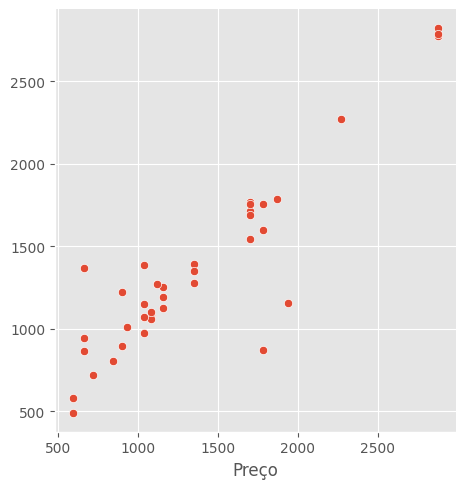

In [375]:
# vendo graficamente o modelo
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
sns.relplot(x = y_test, y = y_pred)
plt.show()

# EXCLUSÃO DE FEATURES CORRELACIONADAS


Se A e B variam no mesmo sentido -
quanto maior A, maior B e vice-versa -, então a relação de A com o target vai ser semelhante à
relação de B com o target. Se A impacta o target positivamente, B também vai impactar. Ter as
duas seria uma redundância que de nada agregaria ao modelo

<ipython-input-376-e38d5823b788>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X.corr()


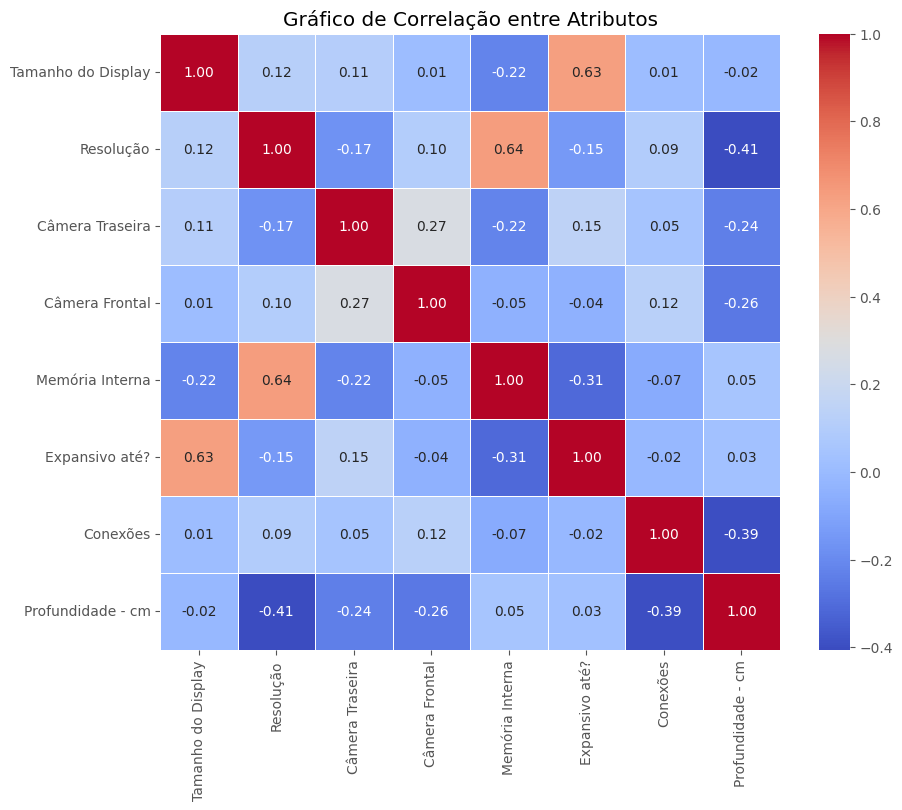

In [376]:
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Gráfico de Correlação entre Atributos")
plt.show()

## Drop Correlation Features

In [377]:
from feature_engine.selection import DropCorrelatedFeatures

In [378]:
tr = DropCorrelatedFeatures(
    method='pearson',
    threshold=0.6
)
# Treinamos com o X_train e apenas aplicamos em X_test
X_train_tr = tr.fit_transform(X_train)
X_test_tr = tr.transform(X_test)

X_train.shape, X_train_tr.shape

((154, 20), (154, 18))

In [379]:
columns_diference = [item for item in list(X_train.columns) if item not in list(X_train_tr.columns)]
columns_diference

['Memória Interna', 'Expansivo até?']

Vamos testar o modelo para ver a sua eficiencia

In [380]:
def tester_pipeline(numerical_cols, ordinal_cols, nominal_cols):
    numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ])

    ordinal_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')), # substituindo valores nulos pela moda
        ('encoder', ce.OrdinalEncoder())
    ])

    nominal_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')), # substituindo valores nulos pela moda
        ('encoder', ce.TargetEncoder())
    ])

    preprocessador = ColumnTransformer(transformers=[
        ('numerical', numerical_pipeline, numerical_cols),
        ('ordinal', ordinal_pipeline, ordinal_cols),
        ('nominal', nominal_pipeline, nominal_cols)
    ])

    rf = XGBRegressor()

    pipe = Pipeline(steps=[
        ('preprocessor', preprocessador),
        ('drop_constant_featurs', DropConstantFeatures()), # É aqui que vamos excluir nossas colunas constantes
        ('regressor', rf)
    ])

    return pipe

In [381]:
# como algumas features foram excluidas, precisamos tira-las da lista de colunas
numerical_features_tr = ['Tamanho do Display', 'Resolução','Câmera Traseira', 'Câmera Frontal', 'Profundidade - cm']

pipe_tr = tester_pipeline(numerical_features_tr, ordinal_features, nominal_features)

# Testando o modelo para esse caso
grid_search = GridSearchCV(pipe_tr, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_tr, y_train)

y_pred = grid_search.predict(X_test_tr)

mae = mean_absolute_error(y_pred, y_test) # Ele está na mesma escala, tendendo a ser mais interpretavel
print(f'Mean Absolute Error(MAE) : {mae:4f}')

Mean Absolute Error(MAE) : 158.973969


## Smart Correlated Selection(coringa)

nesse caso, se tivermos 2 colunas altamente correlacionadas, qual delas devemos dropar? usaremos SmartCorrelatedSelection para poder fazer isso, podemos especificar qual metodo ela vai utilizar para decidir qual será a feature a ser mantida, sendo eles:
- Maior Variância
- Maior Cardinalidade
- Menos Missing
- Melhor Desempenho do modelo

In [382]:
from feature_engine.selection import SmartCorrelatedSelection

scs = SmartCorrelatedSelection(
    method='pearson', # como ele vai medir essa correlação
    threshold=0.6,
    selection_method= 'variance' # Pode ser Variancia, cardinalidade, missing e desempenho
)

X_train_scs = scs.fit_transform(X_train)
X_test_scs = scs.transform(X_test)

X_train.shape, X_train_scs.shape

((154, 20), (154, 18))

In [383]:
columns_diference = [item for item in list(X_train.columns) if item not in list(X_train_scs.columns)]
columns_diference

['Tamanho do Display', 'Memória Interna']

In [384]:
numerical_features_scs = ['Resolução','Câmera Traseira', 'Câmera Frontal','Expansivo até?', 'Profundidade - cm']

pipe_scs = tester_pipeline(numerical_features_scs, ordinal_features, nominal_features)

# Testando o modelo para esse caso
grid_search = GridSearchCV(pipe_scs, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scs, y_train)

y_pred = grid_search.predict(X_test_scs)

mae = mean_absolute_error(y_pred, y_test) # Ele está na mesma escala, tendendo a ser mais interpretavel

print(f'Mean Absolute Error(MAE) : {mae:4f}')

Mean Absolute Error(MAE) : 171.687475


## Mutual Info Regression

Tambem podemos retirar algumas features que sigam algum padrao que podemos escolher, por exemplo, podemos usar o mutual_info_regression para ver quais features possuem uma regressao

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def custom_criterion(x, y):
  x = x.reshape(-1, 1)
  y = y.reshape(-1, 1)
  return mutual_info_regression(x,y)[0]

mi_scs = SmartCorrelatedSelection(
    variables=None,
    method=custom_criterion, # nosso metodo artesanal
    threshold=0.75,
    missing_values='raise',
    selection_method='variance',
    estimator=None
)

X_train_mi = mi_scs.fit_transform(X_train)
X_test_mi = mi_scs.transform(X_test)

X_train.shape, X_train_mi.shape

In [386]:
columns_diference = [item for item in list(X_train.columns) if item not in list(X_train_mi.columns)]
columns_diference

['Tamanho do Display', 'Câmera Frontal']

In [387]:
numerical_features = ['Resolução','Câmera Traseira', 'Memória Interna',
                    'Expansivo até?', 'Profundidade - cm']

pipe_mi = tester_pipeline(numerical_features, ordinal_features, nominal_features)

# Testando o modelo para esse caso
grid_search = GridSearchCV(pipe_mi, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_mi, y_train)

y_pred = grid_search.predict(X_test_mi)

mae = mean_absolute_error(y_pred, y_test) # Ele está na mesma escala, tendendo a ser mais interpretavel

print(f'Mean Absolute Error(MAE) : {mae:4f}')

Mean Absolute Error(MAE) : 155.014411


Nenhuma das features selections baseadas em correções foi eficiente para melhorar o modelo

# SELEÇÃO POR DESEMPENHO SOZINHO

## Select By Single Feature Performance

Basicamente treinaremos -Em varios modelos- cada feature uma a uma, e vamos manter apenas aqueles que tiverem um resultado aceitavel

In [388]:
from sklearn.linear_model import LinearRegression
from feature_engine.selection import SelectBySingleFeaturePerformance

# Selecionameros utilizando a regressão linear usando R2 como metrica
sel = SelectBySingleFeaturePerformance(
    estimator = LinearRegression(),
    scoring='neg_mean_absolute_error',
    cv=5,
    threshold=0.001
)

# Trinamos com X_train e aplicamos no X_test
X_train_sbsfp = sel.fit_transform(X_train, y_train)
X_test_sbsfp = sel.transform(X_test)

In [389]:
columns_diference = [item for item in list(X_train.columns) if item not in list(X_train_sbsfp.columns)]
columns_diference

['Tamanho do Display',
 'Resolução',
 'Câmera Traseira',
 'Câmera Frontal',
 'Memória Interna',
 'Expansivo até?',
 'Conexões',
 'Profundidade - cm']

In [390]:
numerical_features_sbsfp = []

ordinal_features_sbsfp = ['Multichip', 'Tipo de Tela', 'Filmadora', 'Processador','Memória RAM', 'Alimentação, tipo de bateria',
                    'Garantia do Fornecedor', 'Banda', 'Tipo de Chip', 'Conteúdo da Embalagem']


pipe_sbsfp = tester_pipeline(numerical_features_sbsfp, ordinal_features_sbsfp, nominal_features)

# Testando o modelo para esse caso
grid_search = GridSearchCV(pipe_sbsfp, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_sbsfp, y_train)

y_pred = grid_search.predict(X_test_sbsfp)

mae = mean_absolute_error(y_pred, y_test) # Ele está na mesma escala, tendendo a ser mais interpretavel

print(f'Mean Absolute Error(MAE) : {mae:4f}')

Mean Absolute Error(MAE) : 175.410684


In [ ]:
# Utilizando ranodm forest
sfp = SelectBySingleFeaturePerformance(
    estimator=RandomForestRegressor(random_state=42),
    cv=5
)
X_train_sfp = sfp.fit_transform(X_train, y_train)
X_test_sfp = sfp.transform(X_test)


In [392]:
columns_diference = [item for item in list(X_train.columns) if item not in list(X_train_sfp.columns)]
columns_diference

[]

O modelo de random forest nao encontrou ums possivel coluna que pudesse ser retirada

## Eliminação recursiva

Basicamente vai analisar quais sao as features mais inuteis, calcular o desempenho do modelo sem ele, caso tenha aumentado, remove a feature, caso contrario, se mantem. Esse processo é repetido para as outras features inuteis

- Primeiro, você treina um modelo usando todas as features.
- Em seguida, você vai ordenar as features de acordo com sua importância.
- Depois, remova a feature menos importante e rode um novo modelo.
- Calcule o desempenho do novo modelo.
- Calcule a diferença de desempenho entre os 2 modelos.
- Se a queda de desempenho estiver abaixo de um valor determinado, a feature é removida.
Caso contrário, ela é mantida.
- Repita os passos 3-6 até que todas as features tenham sido avaliadas.


In [393]:
from feature_engine.selection import RecursiveFeatureElimination

rfe = RecursiveFeatureElimination(
    RandomForestRegressor(random_state=42),
    cv=5,
    threshold=0.01, # É o valor que precisa aumentar no score para retirar uma feature
    scoring='r2'
)

X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

In [394]:
columns_diference = [item for item in list(X_train.columns) if item not in list(X_train_rfe.columns)]
columns_diference

['Tamanho do Display',
 'Resolução',
 'Câmera Traseira',
 'Câmera Frontal',
 'Memória Interna',
 'Expansivo até?',
 'Profundidade - cm']

In [395]:
numerical_features_rfe = []

pipe_rfe = tester_pipeline(numerical_features_rfe, ordinal_features, nominal_features)

# Testando o modelo para esse caso
grid_search = GridSearchCV(pipe_rfe, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_rfe, y_train)

y_pred = grid_search.predict(X_test_rfe)

mae = mean_absolute_error(y_pred, y_test) # Ele está na mesma escala, tendendo a ser mais interpretavel

print(f'Mean Absolute Error(MAE) : {mae:4f}')

Mean Absolute Error(MAE) : 175.874173


## Adição recursiva

ordenamos pela
feature importance, mas não eliminamos nenhuma feature. Na verdade, a gente começa da
mais importante e vamos adicionando uma por vez, para ver se o modelo melhora ou não

- Treine um estimador usando todas as features.
- Classifique as features de acordo com sua importância, obtida do estimador.
- Treine um estimador com a feature mais importante e calcule o desempenho.
- Adicione a segunda feature mais importante e treine um novo estimador.
- Calcule a diferença de desempenho entre os modelos treinados.
- Se o desempenho aumentar além de um valor determinado, a feature é mantida.
- Repita os passos 4-6 até que todas as features tenham sido avaliadas.


In [396]:
from feature_engine.selection import RecursiveFeatureAddition

rfa = RecursiveFeatureAddition(
    RandomForestRegressor(random_state=42),
    cv=5,
    threshold=0.01, # Quanto o modelo precisa melhora pra adicionar
    scoring='neg_mean_absolute_error'
)

X_train_rfa = rfa.fit_transform(X_train, y_train)
X_test_rfa = rfa.transform(X_test)

In [397]:
columns_diference = [item for item in list(X_train.columns) if item not in list(X_train_rfa.columns)]
columns_diference

['Tamanho do Display',
 'Resolução',
 'Câmera Frontal',
 'Memória Interna',
 'Expansivo até?',
 'Conexões',
 'Profundidade - cm']

Pediu para remover as mesmas features de anteriormente, ja testamos e nao deu bons resultados

**OBS**: Tambem podemos usar varios metodos de feature selection juntos, ex:
- Usar primeiro Drop Constante
- Tirar as colunas correlacionas(usando Smart Correlated por ex)
- Pegar apenas as colunas importantes(usando recursive por exemplo)

# ENCONTRANDO FEATURES RELEVANTES: PERMUTATION IMPORTANCE


A Permutation Importance é uma técnica que mede a importância das características em um modelo ao **embaralhar os valores de uma feature** por vez e medir como isso afeta a precisão do modelo. Características que, quando embaralhadas, causam uma queda significativa na precisão indicam maior importância para o modelo.

basicamente vai bagunças os valores de uma feature, caso mude o valor final da predição, é pq aquela feature tinha um padrão que beneficiava o modelo a fazer uma predição, caso contrario, ela não é tao importante

In [403]:
from sklearn.inspection import permutation_importance

r = permutation_importance(
    grid_search,
    X_test,
    y_test,
    n_repeats=30,
    random_state=42
)

for l in r.importances_mean.argsort()[::-1]:
  if r.importances_mean[l] - 2*r.importances_std[l] > 0:
    print(
        f'{X_test.columns[l]:<8} '
        f'{r.importances_mean[l]:.3f} '
        f'+/- {r.importances_std[l]:.3f}'
    )


Cor      417.065 +/- 55.336


In [404]:
nominal_features_pi = ['Marca']
X_train_ri = X_train.drop(columns=['Cor'])
X_test_ri = X_test.drop(columns=['Cor'])

pipe_pi = tester_pipeline(numerical_features, ordinal_features, nominal_features_pi)

# Testando o modelo para esse caso
grid_search = GridSearchCV(pipe_pi, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_ri, y_train)

y_pred = grid_search.predict(X_test_ri)

mae = mean_absolute_error(y_pred, y_test) # Ele está na mesma escala, tendendo a ser mais interpretavel

print(f'Mean Absolute Error(MAE) : {mae:4f}')

Mean Absolute Error(MAE) : 464.311673
